In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import os
import re

In [5]:
def get_data(fili,varName):
    ds = xr.open_dataset(fili)
    da = ds[varName]
    da = da.rename({'ncl0': 'time'})
    if varName == 'cfsr2':
        da['time'] = pd.date_range('2012-01-01', periods=da.shape[0], freq='AS')
    else:
        da['time'] = pd.date_range('1981-01-01', periods=da.shape[0], freq='AS')
    return da

def shift_time(da):
	date = pd.to_datetime( da.coords['time'].data )
	da.coords['time'] = [dt.datetime( (d.year - 1), d.month, d.day ) for d in date]


In [9]:
diri = r'C:\Users\apbarret\Documents\data\SnowOnSeaIce'

freq_fili = {'cfsr': 'cfsr_arctic_mean_wetday_frequency.nc',
             'erai': 'era_interim_arctic_mean_wetday_frequency.nc',
             'merra2': 'merra2_arctic_mean_wetday_frequency.nc',
             'cfsr2': 'cfsr2_arctic_mean_wetday_frequency.nc',
             'merra': 'merra_arctic_mean_wetday_frequency.nc',
             'jra55': 'jra55_arctic_mean_wetday_frequency.nc'}

mean_fili = {'cfsr': 'cfsr_arctic_mean_wetday_mean.nc',
             'erai': 'era_interim_arctic_mean_wetday_mean.nc',
             'merra2': 'merra2_arctic_mean_wetday_mean.nc',
             'cfsr2': 'cfsr2_arctic_mean_wetday_mean.nc',
             'merra': 'merra_arctic_mean_wetday_mean.nc',
             'jra55': 'jra55_arctic_mean_wetday_mean.nc'}


In [24]:
def import_data(fileList):
    
    result = {}
    for key in freq_fili.keys():
        data = get_data(os.path.join(diri, fileList[key]), key)
        if (key == 'merra2') | (key == 'jra55'):
            shift_time(data)
        result[key] = np.asscalar( data.sel(time=slice('1981-01-01','2010-01-01')).mean().data )
        
    return result

In [25]:
freq = import_data(freq_fili)
freq

{'cfsr': 0.3144259853041733,
 'cfsr2': nan,
 'erai': 0.22444148921988188,
 'jra55': 0.2456644235638391,
 'merra': 0.19550630865679378,
 'merra2': 0.26705490974028473}

In [26]:
ave = import_data(mean_fili)

In [27]:
ave.values()

[2.6525215536275897,
 2.55404073365425,
 2.5515788462048627,
 2.672723250876546,
 nan,
 2.7378935506024935]

In [31]:
x = pd.DataFrame({'Frequency': freq.values(), 'Mean': ave.values()}, index=freq.keys() )
x

,Frequency,Mean
cfsr,0.314426,2.652522
merra,0.195506,2.554041
erai,0.224441,2.551579
merra2,0.267055,2.672723
cfsr2,NaN,NaN
jra55,0.245664,2.737894


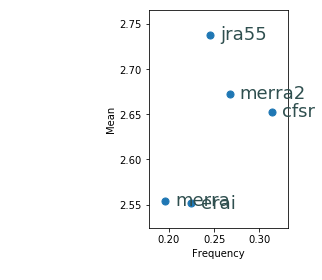

In [38]:
ax = x.plot('Frequency', 'Mean', kind='scatter', s=50)
for k, v in x.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

ax.set_aspect(1.)